# Laboratorio de Redes Neuronales Feedforward
En este laboratorio se deberá implementar una red neuronal Feedforward de 1 capa oculta para realizar una tarea de clasificación binaria. 
Se deberán implementar las funciones necesarias en las etapas del forward pass así como tambien del backward pass o backpropagation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split


## Importar y particionar el dataset

In [2]:
# generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=7)
print(X.shape)
# split dataset 
# train: 70% val: 10% test: 20% = 100%
# extract train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=17)
# 
# correct shape
X_train = X_train.T
y_train = y_train.reshape((1,X_train.shape[1]))

m = X_train.shape[1] # num samples
n_0 = X_train.shape[0] # num input features

# test and val datasets
X_test = X_test.T
y_test = y_test.reshape((1,X_test.shape[1]))

X_val = X_val.T
y_val = y_val.reshape((1,X_val.shape[1]))

print(f'train: X: {X_train.shape} y: {y_train.shape}')
print(f'test: X: {X_test.shape} y: {y_test.shape}')
print(f'val: X: {X_val.shape} y: {y_val.shape}')

(500, 2)
train: X: (2, 350) y: (1, 350)
test: X: (2, 105) y: (1, 105)
val: X: (2, 45) y: (1, 45)


## Visualización del conjunto de entrenamiento

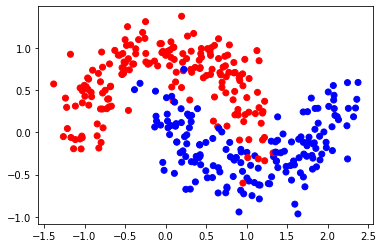

In [3]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[0,:], X_train[1,:], c=y_train, cmap=cm_bright)
plt.show()

In [8]:
def obtener_precision(preds, y):
    if y.shape != preds.shape:
        print('error, los arrays deben ser de la misma dimension!')
        return
    # redondear preds
    preds_red = (preds > 0.5).astype(int)
    n_samples = y.shape[1]
    return np.sum(np.equal(preds_red, y)) / n_samples

## Funciones de activación
Implemente las siguientes funciones de activación en conjunto con la correspondiente derivada:
  - Función sigmoide $\sigma(z) = \frac{1}{1 + \exp^{-z}}$
  - Función tangente hiperbólica $tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
  - Función ReLU $ReLU(z) = max(0, z)$

Notas: 
  - Las funciones de activación y sus correspondientes derivadas deben aceptar como argumento un array de numpy y deben operar **elemento por elemento**.
  - Implemente las derivadas de las funciones de acuerdo a los apuntes de clases.

In [5]:
def sigma(z):
    return 1 / (1 + np.exp(-z))

def sigma_prime(z):
    return sigma(z) * (1 - sigma(z))

In [8]:
A = np.array([[1,3,4],[2,4,5]])
print(A, A.shape)
print(sigma_prime(A), sigma_prime(A).shape)

[[1 3 4]
 [2 4 5]] (2, 3)
[[0.19661193 0.04517666 0.01766271]
 [0.10499359 0.01766271 0.00664806]] (2, 3)


## Descenso de gradiente
Para la implementación del descenso de gradiente, debe implementar los correspondientes pasos:
  - **Forward pass**: El forward pass corresponde con el cálculo de las activaciones y la predicción en la salida de la red.
  - **Backward pass**: Luego de obtener la salida, implemente la retropropagación encontrando las derivadas del costo con respecto a los parámetros.
  - **Actualización de parámetros**: Una vez obtenidas las derivadas, actualice los parámetros usando el algoritmo del descenso de gradiente.
  - **Registro histórico**: Calcule y almacene los valores de la **precision de entrenamiento** y la **precisión de validación** durante el entrenamiento para posterior análisis gráfico.

Notas: Utilice las fórmulas mostradas en clases para el procedimiento de entrenamiento. Realice todos los cálculos utilizando operaciones vectorizadas de numpy.

Recomendaciones: Se recomienda probar el procedimiento de forward pass y backward pass en una celda independiente con el objetivo de verificar que todas las dimensiones de las matrices sean correctas, una vez validado esto, proceda a copiar el código a su bucle de entrenamiento.

In [76]:
# descenso de gradiente
# hiperparametros
alpha = 0.6 # learning rate
n_iters = 1000
# inicializacion de pesos
m = X_train.shape[1] # num samples
n_0 = X_train.shape[0] # num input features
n_1 = 6 # unidades en la capa oculta
# pesos en la capa oculta
W_1 = np.random.rand(n_1, n_0)
b_1 = np.random.rand(n_1, 1)    # vector columna
# pesos en la capa de salida
W_2 = np.random.rand(1, n_1)
b_2 = np.random.rand(1, 1)    # vector columna

# funcion de activacion
g = relu
g_prime = relu_prime

# error inicial

# historial
precision_train = []
precision_val = []
# bucle de entrenamiento
for i in range(n_iters):
    # forward pass

    # gradientes (backward pass)

    # actualizacion

    # calcular y registrar precision de validacion

    # calcular y registrar precision de entrenamiento

    

# Error final

# Graficar curvas de aprendizaje

error porcentual de entrenamiento inicial: 52.29%
error porcentual de test inicial: 46.67%
error porcentual de entrenamiento final: 3.71%
error porcentual de test final: 1.90%
